In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Drink_Dataset = pd.read_csv('D:\Python\Pythonipynb\MLHW4\Drink_Dataset.csv')
Drink_Dataset = Drink_Dataset.drop(columns=['Class'])
print(Drink_Dataset.shape)
Drink_Dataset

(7, 5)


,Drink,Rank,Amount(u),Amount(o),Count
0,7Up,7,100,200,300
1,Sprite,6,200,10,150
2,Pepsi,5,200,10,150
3,Coke,4,400,100,300
4,Cappuccino,3,800,10,150
5,Espresso,2,800,10,150
6,Latte,1,900,400,300


In [3]:
#droping the target column
target = Drink_Dataset['Drink']
data_x = Drink_Dataset.iloc[:,+1:]#改欄位
data_x

,Rank,Amount(u),Amount(o),Count
0,7,100,200,300
1,6,200,10,150
2,5,200,10,150
3,4,400,100,300
4,3,800,10,150
5,2,800,10,150
6,1,900,400,300


In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = scale.fit_transform(data_x.values)
data.shape

(7, 4)

In [5]:
df_matrix = np.asmatrix(data)
print(df_matrix.shape)

(7, 4)


In [6]:
covar_matrix = np.cov(df_matrix.T)
print(covar_matrix.shape)

(4, 4)


In [7]:
eigvalues, eigvectors = np.linalg.eig(covar_matrix)

In [8]:
print(eigvalues)

[2.55236335 1.90242241 0.04903642 0.16284449]


In [9]:
top2eig = eigvectors[:,0:2]
top2eig

array([[-0.58636853,  0.37065529],
       [ 0.56864176, -0.40692339],
       [ 0.4890612 ,  0.49850348],
       [ 0.30600268,  0.66971807]])

In [10]:
new_data = data_x.dot(top2eig)
#creating a new dataframe including target
new_df = pd.DataFrame(np.hstack((new_data,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

new_df

,1st_component,2nd_component,Species
0,242.372639,262.518365,7Up
1,161.001154,26.281999,Sprite
2,161.587523,25.911344,Pepsi
3,365.818152,89.479034,Coke
4,503.945316,-218.984,Cappuccino
5,504.531684,-219.354655,Espresso
6,798.616498,34.456419,Latte


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


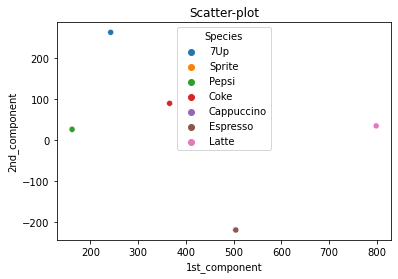

In [11]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Species'])
plt.title('Scatter-plot')
plt.show()

# TSNE

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=20,n_iter=1000)#降維
tsne_result = tsne.fit_transform(data)




#creating a new dataframe including target
new_df_tsne = pd.DataFrame(np.hstack((tsne_result,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])
new_df_tsne

D:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,1st_component,2nd_component,Species
0,214.677826,289.455872,7Up
1,-179.376953,1.767724,Sprite
2,-65.399879,259.366974,Pepsi
3,-13.280415,-225.740204,Coke
4,266.796112,-195.650909,Cappuccino
5,100.699921,31.85853,Espresso
6,380.777405,61.947678,Latte


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


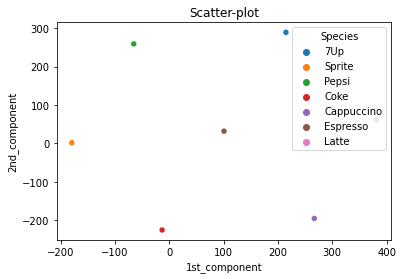

In [13]:
#plotting data
sns.scatterplot(new_df_tsne['1st_component'],new_df_tsne['2nd_component'],hue=new_df_tsne['Species'])
plt.title('Scatter-plot')
plt.show()

# PCA 

In [14]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)#降維
#here data is scaled data that we did earlier using standard scalar
pca_components = pca.fit_transform(data)
print(pca_components.shape)

(7, 2)


In [15]:
#creating a new dataframe including target
new_df_pca = pd.DataFrame(np.hstack((pca_components,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])
new_df_pca

,1st_component,2nd_component,Species
0,-0.889961,2.171801,7Up
1,-1.710052,-0.185877,Sprite
2,-1.416868,-0.371205,Pepsi
3,0.177598,0.863802,Coke
4,0.257339,-1.520324,Cappuccino
5,0.550523,-1.705651,Espresso
6,3.031421,0.747452,Latte


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


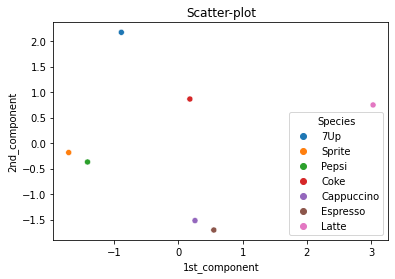

In [16]:
#plotting data
sns.scatterplot(new_df_pca['1st_component'],new_df_pca['2nd_component'],hue=new_df_pca['Species'])
plt.title('Scatter-plot')
plt.show()

# 動態圖PCA  TSNE

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


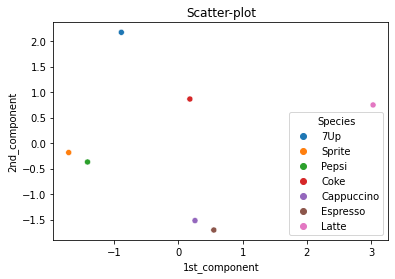

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


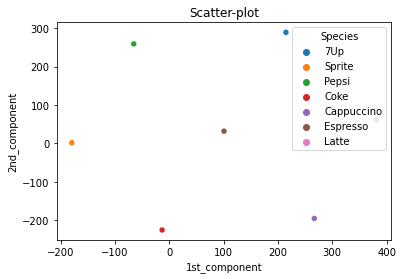

In [23]:
from mpld3 import plugins
#PCA
sns.scatterplot(new_df_pca['1st_component'],new_df_pca['2nd_component'],hue=new_df_pca['Species'])
plt.title('Scatter-plot')
plt.show()
#TSNE
sns.scatterplot(new_df_tsne['1st_component'],new_df_tsne['2nd_component'],hue=new_df_tsne['Species'])
plt.title('Scatter-plot')
plt.show()
        
plugins.connect(fig,plugins.LinkedBrush(points))



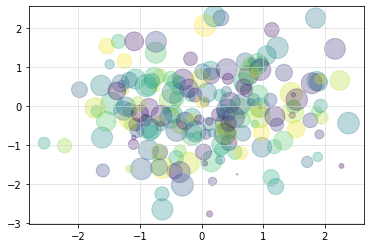

In [19]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

In [20]:
import mpld3
mpld3.display(fig)

In [21]:
mpld3.enable_notebook()

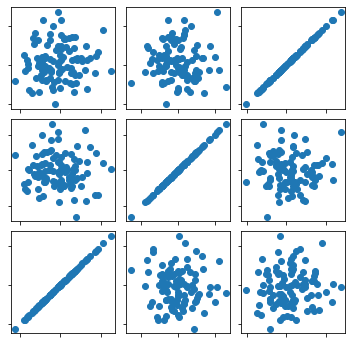

In [22]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = np.random.normal(size=(3, 100))
for i in range(3):
    for j in range(3):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X[j], X[i])
        
plugins.connect(fig, plugins.LinkedBrush(points))